In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot

In [4]:
import pandas as pd
import string
import numpy as np
import nltk

from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, OneHotEncoder

from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Responden.csv')
df.describe()

,Woody,Spicy,Floral,Gourmand,Akuatik,Fruity,Max,Index
count,574.000000,567.000000,569.000000,564.000000,564.000000,575.000000,639.000000,638.000000
mean,2.827526,2.617284,2.922671,2.918440,2.957447,3.066087,15.434207,0.631661
std,1.184487,1.137189,1.278614,1.254653,1.249496,1.306303,7.810524,0.482732
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,18.000000,1.000000
75%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,21.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,1.000000


In [6]:
df = pd.read_csv('Responden.csv')
df.head()

,Timestamp,Gender,Use,Woody,Option 1,Spicy,Option 2,Floral,Option 3,Gourmand,Option 4,Akuatik,Option 5,Fruity,Option 6,Komposisi\n,Max,Index,Category
0,24/10/2022 12:17:02,Perempuan,Ya,3.0,Kayu Manis,3.0,Rumput - rumputan,4.0,Lily,4.0,Popcorn,4.0,Air laut,4.0,Lemon,Vanilla,22.0,1.0,Feminim
1,25/10/2022 19:18:22,Laki - Laki,Ya,3.0,Kayu Manis,3.0,Cengkeh,3.0,Melati,3.0,Permen,3.0,Air laut,3.0,Lemon,One direction,18.0,1.0,Feminim
2,25/10/2022 19:19:58,Laki - Laki,Ya,3.0,Kayu Manis,5.0,Lada,4.0,Melati,5.0,Cokelat,4.0,Air laut,5.0,Jeruk,Mint,26.0,1.0,Feminim
3,25/10/2022 19:20:45,Laki - Laki,Ya,5.0,Kayu Cendana,5.0,Lada,5.0,Melati,5.0,Cokelat,5.0,Air laut,5.0,Jeruk,Mint,30.0,1.0,Feminim
4,25/10/2022 19:24:10,Perempuan,Ya,3.0,Kayu Manis,4.0,Rumput - rumputan,4.0,Lily,3.0,Popcorn,4.0,Air laut,4.0,Jeruk,"Jeruk, vanila dan rose",22.0,1.0,Feminim


In [7]:
to_drop = ['Timestamp', 'Use', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Option 5', 'Option 6',
           'Komposisi\n', 'Index']

In [8]:
df.drop(to_drop, inplace=True, axis=1)

In [9]:
df.head()

,Gender,Woody,Spicy,Floral,Gourmand,Akuatik,Fruity,Max,Category
0,Perempuan,3.0,3.0,4.0,4.0,4.0,4.0,22.0,Feminim
1,Laki - Laki,3.0,3.0,3.0,3.0,3.0,3.0,18.0,Feminim
2,Laki - Laki,3.0,5.0,4.0,5.0,4.0,5.0,26.0,Feminim
3,Laki - Laki,5.0,5.0,5.0,5.0,5.0,5.0,30.0,Feminim
4,Perempuan,3.0,4.0,4.0,3.0,4.0,4.0,22.0,Feminim


<AxesSubplot:>

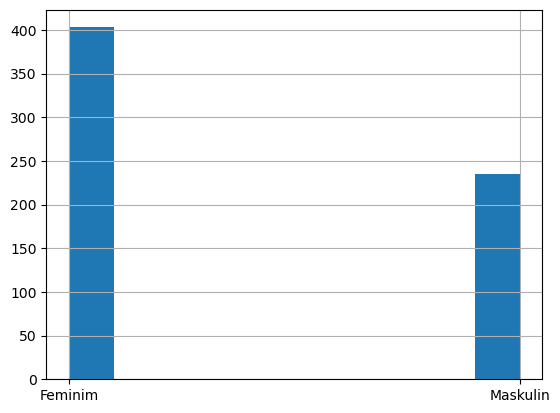

In [10]:
df["Category"].hist()

In [11]:
df['GDindx'] = np.where(df['Category']=='Feminim', 1,0)

In [12]:
df.head(5)

,Gender,Woody,Spicy,Floral,Gourmand,Akuatik,Fruity,Max,Category,GDindx
0,Perempuan,3.0,3.0,4.0,4.0,4.0,4.0,22.0,Feminim,1
1,Laki - Laki,3.0,3.0,3.0,3.0,3.0,3.0,18.0,Feminim,1
2,Laki - Laki,3.0,5.0,4.0,5.0,4.0,5.0,26.0,Feminim,1
3,Laki - Laki,5.0,5.0,5.0,5.0,5.0,5.0,30.0,Feminim,1
4,Perempuan,3.0,4.0,4.0,3.0,4.0,4.0,22.0,Feminim,1


<AxesSubplot:>

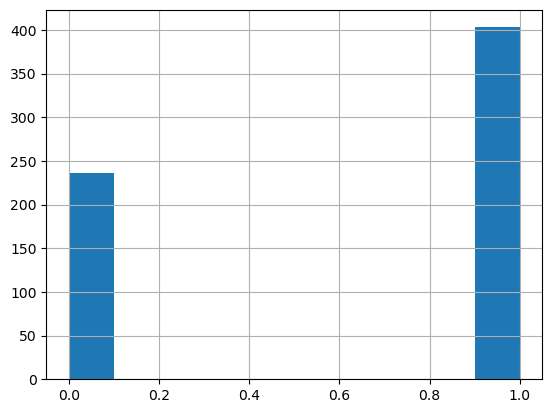

In [13]:
df["GDindx"].hist()

In [14]:
df.head(100)

,Gender,Woody,Spicy,Floral,Gourmand,Akuatik,Fruity,Max,Category,GDindx
0,Perempuan,3.0,3.0,4.0,4.0,4.0,4.0,22.0,Feminim,1
1,Laki - Laki,3.0,3.0,3.0,3.0,3.0,3.0,18.0,Feminim,1
2,Laki - Laki,3.0,5.0,4.0,5.0,4.0,5.0,26.0,Feminim,1
3,Laki - Laki,5.0,5.0,5.0,5.0,5.0,5.0,30.0,Feminim,1
4,Perempuan,3.0,4.0,4.0,3.0,4.0,4.0,22.0,Feminim,1
...,...,...,...,...,...,...,...,...,...,...
95,Perempuan,3.0,4.0,4.0,4.0,3.0,4.0,22.0,Feminim,1
96,Perempuan,3.0,3.0,4.0,4.0,3.0,4.0,21.0,Feminim,1
97,Perempuan,3.0,3.0,3.0,3.0,3.0,3.0,18.0,Feminim,1
98,Laki - Laki,3.0,3.0,3.0,3.0,3.0,3.0,18.0,Feminim,1


In [15]:
df['indx'] = np.where(df['Gender']=='Perempuan', 1,0)

In [16]:
df.head(5)

,Gender,Woody,Spicy,Floral,Gourmand,Akuatik,Fruity,Max,Category,GDindx,indx
0,Perempuan,3.0,3.0,4.0,4.0,4.0,4.0,22.0,Feminim,1,1
1,Laki - Laki,3.0,3.0,3.0,3.0,3.0,3.0,18.0,Feminim,1,0
2,Laki - Laki,3.0,5.0,4.0,5.0,4.0,5.0,26.0,Feminim,1,0
3,Laki - Laki,5.0,5.0,5.0,5.0,5.0,5.0,30.0,Feminim,1,0
4,Perempuan,3.0,4.0,4.0,3.0,4.0,4.0,22.0,Feminim,1,1


In [17]:
df.isna().sum()

Gender       3
Woody       65
Spicy       72
Floral      70
Gourmand    75
Akuatik     75
Fruity      64
Max          0
Category     1
GDindx       0
indx         0
dtype: int64

In [18]:
df.isna().sum()

Gender       3
Woody       65
Spicy       72
Floral      70
Gourmand    75
Akuatik     75
Fruity      64
Max          0
Category     1
GDindx       0
indx         0
dtype: int64

In [19]:
df.head(600)

,Gender,Woody,Spicy,Floral,Gourmand,Akuatik,Fruity,Max,Category,GDindx,indx
0,Perempuan,3.0,3.0,4.0,4.0,4.0,4.0,22.0,Feminim,1,1
1,Laki - Laki,3.0,3.0,3.0,3.0,3.0,3.0,18.0,Feminim,1,0
2,Laki - Laki,3.0,5.0,4.0,5.0,4.0,5.0,26.0,Feminim,1,0
3,Laki - Laki,5.0,5.0,5.0,5.0,5.0,5.0,30.0,Feminim,1,0
4,Perempuan,3.0,4.0,4.0,3.0,4.0,4.0,22.0,Feminim,1,1
...,...,...,...,...,...,...,...,...,...,...,...
595,Laki - Laki,3.0,3.0,3.0,4.0,4.0,4.0,21.0,Feminim,1,0
596,Laki - Laki,1.0,1.0,1.0,1.0,1.0,1.0,6.0,Maskulin,0,0
597,Laki - Laki,4.0,3.0,3.0,4.0,4.0,3.0,21.0,Feminim,1,0
598,Laki - Laki,1.0,1.0,1.0,1.0,1.0,1.0,6.0,Maskulin,0,0


In [20]:
print("Column datatypes: ")
print(df)

Column datatypes: 
          Gender  Woody   Spicy   Floral  Gourmand  Akuatik  Fruity  \
0      Perempuan     3.0     3.0     4.0       4.0      4.0     4.0   
1    Laki - Laki     3.0     3.0     3.0       3.0      3.0     3.0   
2    Laki - Laki     3.0     5.0     4.0       5.0      4.0     5.0   
3    Laki - Laki     5.0     5.0     5.0       5.0      5.0     5.0   
4      Perempuan     3.0     4.0     4.0       3.0      4.0     4.0   
..           ...     ...     ...     ...       ...      ...     ...   
634  Laki - Laki     NaN     4.0     NaN       NaN      NaN     NaN   
635  Laki - Laki     NaN     NaN     NaN       NaN      3.0     NaN   
636  Laki - Laki     NaN     NaN     NaN       2.0      NaN     NaN   
637          NaN     NaN     NaN     NaN       NaN      NaN     NaN   
638          NaN     NaN     NaN     NaN       NaN      NaN     NaN   

           Max  Category  GDindx  indx  
0    22.000000   Feminim       1     1  
1    18.000000   Feminim       1     0  
2    

In [21]:
df.isna().sum()

Gender       3
Woody       65
Spicy       72
Floral      70
Gourmand    75
Akuatik     75
Fruity      64
Max          0
Category     1
GDindx       0
indx         0
dtype: int64

In [22]:
rata_cate = df['Gourmand'].mean()
df['Gourmand'] = df['Gourmand'].fillna(rata_cate)
df['Gourmand'].isna().sum()

0

In [23]:
df.isna().sum()

Gender       3
Woody       65
Spicy       72
Floral      70
Gourmand     0
Akuatik     75
Fruity      64
Max          0
Category     1
GDindx       0
indx         0
dtype: int64

In [24]:
df.dropna(inplace = True)

print(df.to_string())

          Gender  Woody   Spicy   Floral  Gourmand  Akuatik  Fruity   Max  Category  GDindx  indx
0      Perempuan     3.0     3.0     4.0   4.00000      4.0     4.0  22.0   Feminim       1     1
1    Laki - Laki     3.0     3.0     3.0   3.00000      3.0     3.0  18.0   Feminim       1     0
2    Laki - Laki     3.0     5.0     4.0   5.00000      4.0     5.0  26.0   Feminim       1     0
3    Laki - Laki     5.0     5.0     5.0   5.00000      5.0     5.0  30.0   Feminim       1     0
4      Perempuan     3.0     4.0     4.0   3.00000      4.0     4.0  22.0   Feminim       1     1
5      Perempuan     3.0     3.0     4.0   4.00000      2.0     5.0  21.0   Feminim       1     1
6    Laki - Laki     4.0     3.0     3.0   5.00000      3.0     5.0  23.0   Feminim       1     0
7      Perempuan     3.0     3.0     3.0   4.00000      4.0     4.0  21.0   Feminim       1     1
8      Perempuan     4.0     4.0     4.0   4.00000      5.0     5.0  26.0   Feminim       1     1
9      Perempuan    

In [25]:
df.isna().sum()

Gender      0
Woody       0
Spicy       0
Floral      0
Gourmand    0
Akuatik     0
Fruity      0
Max         0
Category    0
GDindx      0
indx        0
dtype: int64

<AxesSubplot:>

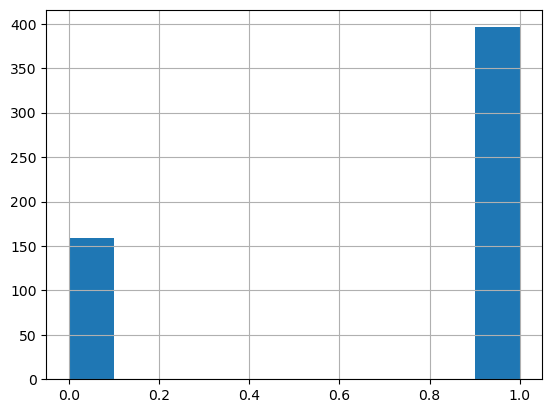

In [26]:
df["GDindx"].hist()

<AxesSubplot:>

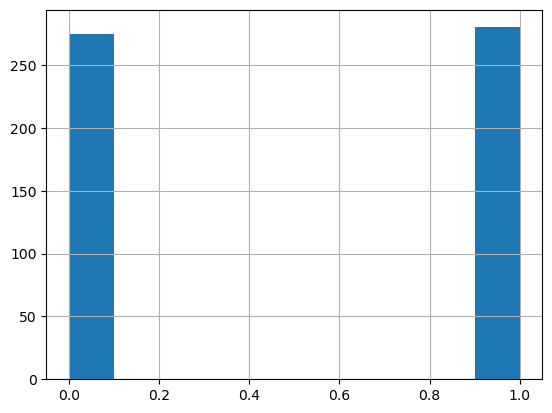

In [27]:
df["indx"].hist()

In [28]:
df.describe()

,Woody,Spicy,Floral,Gourmand,Akuatik,Fruity,Max,GDindx,indx
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,2.821622,2.605405,2.906306,2.902262,2.949550,3.054054,17.223423,0.713514,0.504505
std,1.189106,1.140479,1.282433,1.249345,1.255017,1.315266,6.458182,0.452527,0.500431
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,14.000000,0.000000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,19.000000,1.000000,1.000000
75%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,22.000000,1.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,1.000000,1.000000


In [29]:
to_drop = ['Max']

In [30]:
df.drop(to_drop, inplace=True, axis=1)

In [31]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
df.head()

,Gender,Woody,Spicy,Floral,Gourmand,Akuatik,Fruity,Category,GDindx,indx
0,Perempuan,3.0,3.0,4.0,4.0,4.0,4.0,Feminim,1,1
1,Laki - Laki,3.0,3.0,3.0,3.0,3.0,3.0,Feminim,1,0
2,Laki - Laki,3.0,5.0,4.0,5.0,4.0,5.0,Feminim,1,0
3,Laki - Laki,5.0,5.0,5.0,5.0,5.0,5.0,Feminim,1,0
4,Perempuan,3.0,4.0,4.0,3.0,4.0,4.0,Feminim,1,1


In [33]:
to_drop = ['Category']

In [34]:
df.drop(to_drop, inplace=True, axis=1)

In [35]:
to_drop = ['Gender']

In [36]:
df.drop(to_drop, inplace=True, axis=1)

In [37]:
from imblearn.combine import SMOTEENN

X = df.drop(['GDindx'],axis=1) 
y = df['GDindx'] 
 
smt = SMOTEENN(random_state=42) 
X, y = smt.fit_resample(X, y) 
print(y.value_counts())

0    392
1    368
Name: GDindx, dtype: int64


<AxesSubplot:>

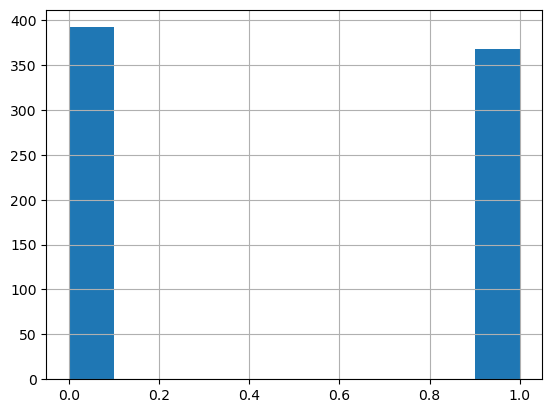

In [38]:
y.hist()

In [39]:
print(df)

     Woody   Spicy   Floral  Gourmand  Akuatik  Fruity  GDindx  indx
0       3.0     3.0     4.0       4.0      4.0     4.0       1     1
1       3.0     3.0     3.0       3.0      3.0     3.0       1     0
2       3.0     5.0     4.0       5.0      4.0     5.0       1     0
3       5.0     5.0     5.0       5.0      5.0     5.0       1     0
4       3.0     4.0     4.0       3.0      4.0     4.0       1     1
..      ...     ...     ...       ...      ...     ...     ...   ...
623     1.0     1.0     1.0       1.0      1.0     1.0       0     0
624     1.0     1.0     1.0       1.0      1.0     1.0       0     0
625     1.0     1.0     1.0       1.0      1.0     1.0       0     0
626     1.0     1.0     1.0       1.0      1.0     1.0       0     0
627     1.0     1.0     1.0       1.0      1.0     1.0       0     0

[555 rows x 8 columns]


In [40]:
print(df)

     Woody   Spicy   Floral  Gourmand  Akuatik  Fruity  GDindx  indx
0       3.0     3.0     4.0       4.0      4.0     4.0       1     1
1       3.0     3.0     3.0       3.0      3.0     3.0       1     0
2       3.0     5.0     4.0       5.0      4.0     5.0       1     0
3       5.0     5.0     5.0       5.0      5.0     5.0       1     0
4       3.0     4.0     4.0       3.0      4.0     4.0       1     1
..      ...     ...     ...       ...      ...     ...     ...   ...
623     1.0     1.0     1.0       1.0      1.0     1.0       0     0
624     1.0     1.0     1.0       1.0      1.0     1.0       0     0
625     1.0     1.0     1.0       1.0      1.0     1.0       0     0
626     1.0     1.0     1.0       1.0      1.0     1.0       0     0
627     1.0     1.0     1.0       1.0      1.0     1.0       0     0

[555 rows x 8 columns]


In [41]:
xTarget =df.drop(['indx','GDindx'],axis = 1)
print(xTarget)

     Woody   Spicy   Floral  Gourmand  Akuatik  Fruity
0       3.0     3.0     4.0       4.0      4.0     4.0
1       3.0     3.0     3.0       3.0      3.0     3.0
2       3.0     5.0     4.0       5.0      4.0     5.0
3       5.0     5.0     5.0       5.0      5.0     5.0
4       3.0     4.0     4.0       3.0      4.0     4.0
..      ...     ...     ...       ...      ...     ...
623     1.0     1.0     1.0       1.0      1.0     1.0
624     1.0     1.0     1.0       1.0      1.0     1.0
625     1.0     1.0     1.0       1.0      1.0     1.0
626     1.0     1.0     1.0       1.0      1.0     1.0
627     1.0     1.0     1.0       1.0      1.0     1.0

[555 rows x 6 columns]


In [42]:
yTarget = df['GDindx']
print(yTarget)

0      1
1      1
2      1
3      1
4      1
      ..
623    0
624    0
625    0
626    0
627    0
Name: GDindx, Length: 555, dtype: int32


In [43]:
encoder = LabelBinarizer()
Y = encoder.fit_transform(yTarget)
print(Y)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


In [44]:
tfidf_transformer = OneHotEncoder()
X = tfidf_transformer.fit_transform(xTarget)
print(X)
print(X.shape)

  (0, 2)	1.0
  (0, 7)	1.0
  (0, 13)	1.0
  (0, 19)	1.0
  (0, 24)	1.0
  (0, 29)	1.0
  (1, 2)	1.0
  (1, 7)	1.0
  (1, 12)	1.0
  (1, 18)	1.0
  (1, 23)	1.0
  (1, 28)	1.0
  (2, 2)	1.0
  (2, 9)	1.0
  (2, 13)	1.0
  (2, 20)	1.0
  (2, 24)	1.0
  (2, 30)	1.0
  (3, 4)	1.0
  (3, 9)	1.0
  (3, 14)	1.0
  (3, 20)	1.0
  (3, 25)	1.0
  (3, 30)	1.0
  (4, 2)	1.0
  :	:
  (550, 26)	1.0
  (551, 0)	1.0
  (551, 5)	1.0
  (551, 10)	1.0
  (551, 15)	1.0
  (551, 21)	1.0
  (551, 26)	1.0
  (552, 0)	1.0
  (552, 5)	1.0
  (552, 10)	1.0
  (552, 15)	1.0
  (552, 21)	1.0
  (552, 26)	1.0
  (553, 0)	1.0
  (553, 5)	1.0
  (553, 10)	1.0
  (553, 15)	1.0
  (553, 21)	1.0
  (553, 26)	1.0
  (554, 0)	1.0
  (554, 5)	1.0
  (554, 10)	1.0
  (554, 15)	1.0
  (554, 21)	1.0
  (554, 26)	1.0
(555, 31)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(388, 31)
(388, 1)
(167, 31)
(167, 1)


In [46]:
NaiveBayes = MultinomialNB().fit(X_train,np.ravel(y_train,order='C'))
print(NaiveBayes)

MultinomialNB()


In [47]:
NaiveBayes = MultinomialNB().fit(X_train,np.ravel(y_train,order='C'))
print(NaiveBayes)

MultinomialNB()


In [48]:
prediction = NaiveBayes.predict(X_test)
accuracies = accuracy_score(y_test, prediction)

print(prediction)
print(accuracies)

[0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1]
0.9221556886227545


In [49]:
print(confusion_matrix(y_test, prediction))

[[ 36  12]
 [  1 118]]


In [50]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
                         
                         
                         
    """
    This function prints and plots the confution matrix.
    Normalixation can be applied by setting 'normalize=True'
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
        
    cm = confusion_matrix(y_true, y_pred)
        
    classes = classes[unique_labels(y_true, y_pred)]
    
    if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
    else:
            print("Confusion matrix, without normalization")
            
    print(cm)
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Prediction label')
        
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
         
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
                    
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 36  12]
 [  1 118]]
Normalized confusion matrix
[[0.75 0.25]
 [0.01 0.99]]


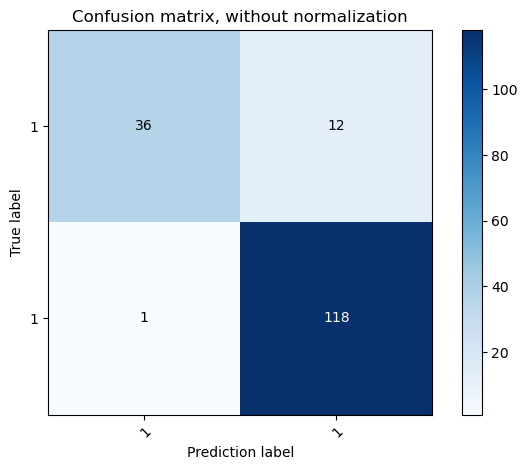

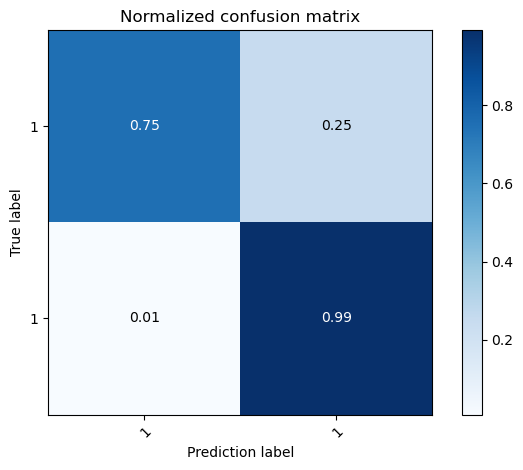

In [51]:
class_names = yTarget
np.set_printoptions(precision=2)

plot_confusion_matrix(y_test, prediction, classes=class_names,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(y_test, prediction, classes=class_names, normalize=True,
                       title='Normalized confusion matrix')
                     
                      
plt.show()